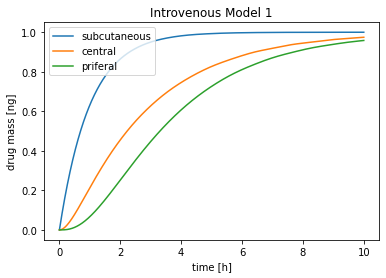

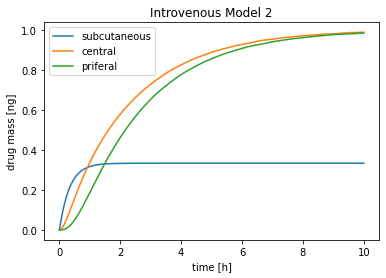

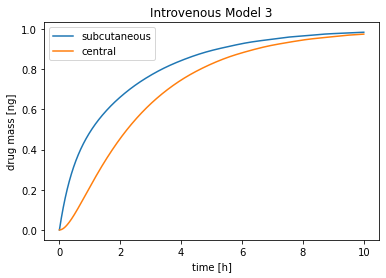

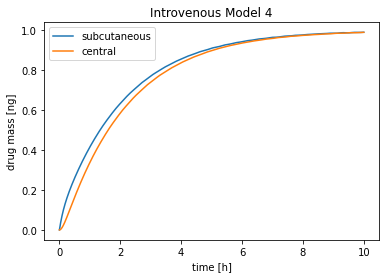

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import numpy as np
import pandas
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import scipy
from scipy import special

# module definitions are noted here with 

def rhs_subcutaneous(t, y, ka, Q_p1, V_c, V_p1, CL, X):
    q0, q_c, q_p1= y
    transition = Q_p1 * (q_c / V_c - q_p1 / V_p1)
    dq0_dt = dose(t,X) - ka * q0
    dqc_dt = ka * q0 - q_c / V_c * CL - transition
    dqp1_dt = transition
    return [dq0_dt,dqc_dt, dqp1_dt]




model1_args = {
    'name': 'subcutaneous basic',
    'ka': 1.0,
    'Q_p1': 1.0,
    'V_c': 1.0,
    'V_p1': 1.0,
    'CL': 1.0,
    'X': 1.0,
   
}

model2_args = {
    'name': 'subcutaneous plus',
    'ka': 3.0,
    'Q_p1': 2.0,
    'V_c': 1.0,
    'V_p1': 1.0,
    'CL': 1.0,
    'X': 1.0,
}


def rhs_intravenous(t, y, Q_p1, V_c, V_p1, CL, X):
    q_c, q_p1 = y
    transition = Q_p1 * (q_c / V_c - q_p1 / V_p1)
    dqc_dt = dose(t, X) - q_c / V_c * CL - transition
    dqp1_dt = transition
    return [dqc_dt, dqp1_dt]


model3_args = {
    'name': 'intravenous basic',
    'Q_p1': 1.0,
    'V_c': 1.0,
    'V_p1': 1.0,
    'CL': 1.0,
    'X': 1.0,
    
}    
model4_args = {
    'name': 'intravenous plus',
    'Q_p1': 4.0,
    'V_c': 1.0,
    'V_p1': 1.0,
    'CL': 1.0,
    'X': 1.0,
}
    
    
t_eval = np.linspace(0, 10, 10000)
y0 = np.array([0.0, 0.0, 0.0])

def dose(t, X):
    return X



# plots for Model 1, taking into argument model 1, where ka[/h] is the “absorption” rate for the s.c dosing


args = [
        model1_args['ka'], model1_args['Q_p1'], model1_args['V_c'], model1_args['V_p1'], model1_args['CL'], model1_args['X']
    ]



sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: rhs_subcutaneous(t, y, *args),
        t_span=[t_eval[0], t_eval[-1]],
        y0=y0, t_eval=t_eval
    )


names = ['subcutaneous','central','periferal']



def plot_model(solution, names):
    
    
    for i in range (solution.y.shape[0]):
        plt.plot (solution.t, solution.y[i,:], label = names[i])
    
   
   
    plt.legend(('subcutaneous', 'central', 'priferal'), loc='upper left')
    plt.title('Introvenous Model 1')
    plt.ylabel('drug mass [ng]')
    plt.xlabel('time [h]')
    plt.show()
plot_model (sol, names)




# plots for Model 2, taking into argument model 2, where ka[/h] is the “absorption” rate for the s.c dosing


args = [
        model2_args['ka'], model2_args['Q_p1'], model2_args['V_c'], model2_args['V_p1'], model2_args['CL'], model2_args['X']
    ]


sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: rhs_subcutaneous(t, y, *args),
        t_span=[t_eval[0], t_eval[-1]],
        y0=y0, t_eval=t_eval
    )


names = ['subcutaneous','central','periferal']



def plot_model(solution, names):
    
    
    for i in range (solution.y.shape[0]):
        plt.plot (solution.t, solution.y[i,:], label = names[i])
    
   
    
    plt.legend(('subcutaneous', 'central', 'priferal'), loc='upper left')
    plt.title('Introvenous Model 2')
    plt.ylabel('drug mass [ng]')
    plt.xlabel('time [h]')
    plt.show()
plot_model (sol, names)



# plots for Model 3, taking into argument model 3, where ka[/h] is not in there
args = [
        model3_args['Q_p1'], model3_args['V_c'], model3_args['V_p1'], model3_args['CL'], model3_args['X']
    ]

y0 = np.array([0.0, 0.0])
sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: rhs_intravenous(t, y, *args),
        t_span=[t_eval[0], t_eval[-1]],
        y0=y0, t_eval=t_eval
    )


names = ['subcutaneous','central','periferal']



def plot_model(solution, names):
    
    
    for i in range (solution.y.shape[0]):
        plt.plot (solution.t, solution.y[i,:], label = names[i])
    
   
    plt.legend(('subcutaneous', 'central'), loc='upper left')
    plt.title('Introvenous Model 3')
    plt.ylabel('drug mass [ng]')
    plt.xlabel('time [h]')
    plt.show()
plot_model (sol, names)


# plots for Model 4, taking into argument model 4, where ka[/h] is not in there

args = [
        model4_args['Q_p1'], model4_args['V_c'], model4_args['V_p1'], model4_args['CL'], model4_args['X']
    ]

y0 = np.array([0.0, 0.0])
sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: rhs_intravenous(t, y, *args),
        t_span=[t_eval[0], t_eval[-1]],
        y0=y0, t_eval=t_eval
    )


names = ['subcutaneous','central']



def plot_model(solution, names):
    
    
    for i in range (solution.y.shape[0]):
        plt.plot (solution.t, solution.y[i,:], label = names[i])
    
   
    
    plt.legend(('subcutaneous', 'central'), loc='upper left')
    plt.title('Introvenous Model 4')
    
    plt.ylabel('drug mass [ng]')
    plt.xlabel('time [h]')
    plt.show()
plot_model (sol, names)

